# Data analysis

In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Getting the data

In [94]:

X1 = pd.read_csv("data/X1.csv", index_col=0)
Y1 = pd.read_csv("data/Y1.csv", header=None, names=['weight'])


df_base = pd.concat([X1, Y1], axis=1)

# We create a copy the data to analyze it
df = df_base.copy()

### Checking the first 5 rows

In [3]:
df.head()


,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,weight
0,Male,21.0,1.88,yes,yes,3.0,3.0,Sometimes,no,3.0,no,2.0,1.0,Sometimes,Walking,84.0
1,Male,19.0,1.70,yes,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,60.0
2,Male,18.0,1.86,yes,yes,2.0,1.0,Sometimes,yes,2.0,no,1.0,2.0,Sometimes,Public_Transportation,110.0
3,Female,21.0,1.61,yes,yes,3.0,3.0,Sometimes,no,3.0,no,0.0,1.0,Sometimes,Walking,54.5
4,Female,22.0,1.61,yes,yes,3.0,3.0,Frequently,no,3.0,no,1.0,0.0,no,Public_Transportation,63.0


## Changing the data's format

### Changing columns names

In [95]:
columns = ['Gender', 'Age', 'Height', 'Family history with overweight', 'Consumption of high caloric food',
           'Consumption frequency of vegetables', 'Number of main meals daily', 'Food Consumption between meals', 'Smoke',
           'Water consumption daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
           'Alcohol consumption', 'Usual transportation used', 'Weight']
df.columns = columns

### Values mapping
Compared to the survey somme values are changed. We will map these values to the original answers giving to the survey.

In [96]:
df['Consumption frequency of vegetables'] = df['Consumption frequency of vegetables'].replace(
    {1: '1. Never', 2: '2. Sometimes', 3: '3. Always'})
df['Number of main meals daily'] = df['Number of main meals daily'].replace(
    {1: '1', 2: '2', 3: '3', 4: '3+'})
df['Water consumption daily'] = df['Water consumption daily'].replace(
    {1: '1. Less than 1L', 2: '2. Between 1L and 2L', 3: '3. More than 2L'})
df['Physical activity frequency'] = df['Physical activity frequency'].replace(
    {0: '1. I do not have', 1: '2. 1 or 2 days', 2: '3. 2 or 4 days', 3: '4. 4 or 5 days'})
df['Time using technology devices'] = df['Time using technology devices'].replace(
    {0: '1. 0–2 hours', 1: '2. 3–5 hours', 2: '3. More than 5 hours'})
df['Food Consumption between meals'] = df['Food Consumption between meals'].replace(
    {'no' : '1. No', 'Sometimes' : '2. Sometimes', 'Frequently': '3. Frequently','Always': '4. Always'})
# Setting the height in cm will be usefull for the bivariate analysis
#df['Height'] = df['Height']*100
#df['Age'] = df['Age'].map(lambda x: np.log(x))


## Data exploration

### Getting all unique values of the dataset

In [97]:
for col in df:
    print(f"{col} : {sorted(df[col].unique())}")


Gender : ['Female', 'Male']
Age : [15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 38.0, 40.0, 41.0, 51.0, 55.0]
Height : [1.48, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9, 1.93]
Family history with overweight : ['no', 'yes']
Consumption of high caloric food : ['no', 'yes']
Consumption frequency of vegetables : ['1. Never', '2. Sometimes', '3. Always']
Number of main meals daily : ['1', '3', '3+']
Food Consumption between meals : ['1. No', '2. Sometimes', '3. Frequently', '4. Always']
Smoke : ['no', 'yes']
Water consumption daily : ['1. Less than 1L', '2. Between 1L and 2L', '3. More than 2L']
Calories consumption monitoring : ['no', 'yes']
Physical activity frequency : ['1. I do not have', '2. 1 or 2 days', '3. 2 o

### Checking if they are any null values

<AxesSubplot:>

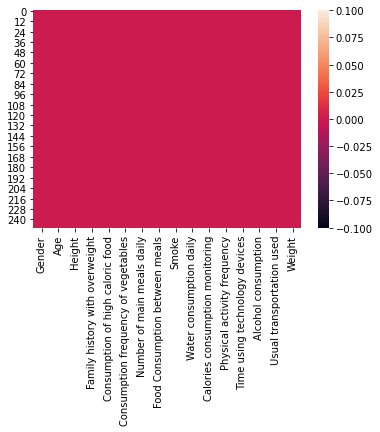

In [7]:
sns.heatmap(df.isna())

### Getting the general informations of the columns

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gender                               250 non-null    object 
 1   Age                                  250 non-null    float64
 2   Height                               250 non-null    float64
 3   Family history with overweight       250 non-null    object 
 4   Consumption of high caloric food     250 non-null    object 
 5   Consumption frequency of vegetables  250 non-null    object 
 6   Number of main meals daily           250 non-null    object 
 7   Food Consumption between meals       250 non-null    object 
 8   Smoke                                250 non-null    object 
 9   Water consumption daily              250 non-null    object 
 10  Calories consumption monitoring      250 non-null    object 
 11  Physical activity frequency     

In [9]:
df.describe()


,Age,Height,Weight
count,250.000000,250.000000,250.000000
mean,22.560000,1.685480,68.724400
std,6.227804,0.097688,16.540468
min,15.000000,1.480000,42.000000
25%,18.000000,1.600000,57.000000
50%,21.000000,1.670000,66.000000
75%,23.000000,1.760000,79.750000
max,55.000000,1.930000,173.000000


### Plotting the pairplot

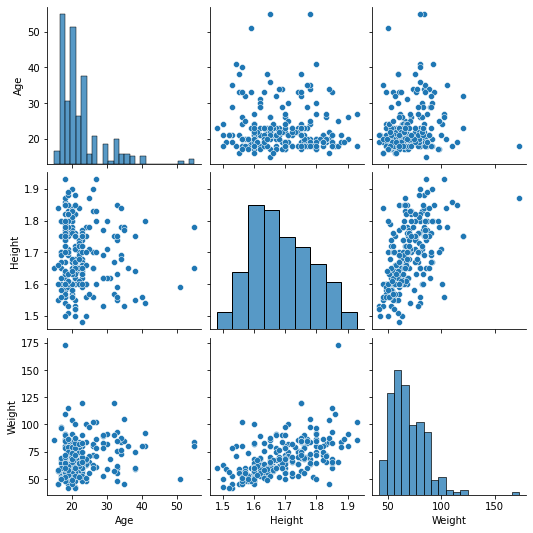

In [10]:
sns.pairplot(df)


## Univariate analysis

### Getting the target distribution

<AxesSubplot:xlabel='Weight', ylabel='count'>

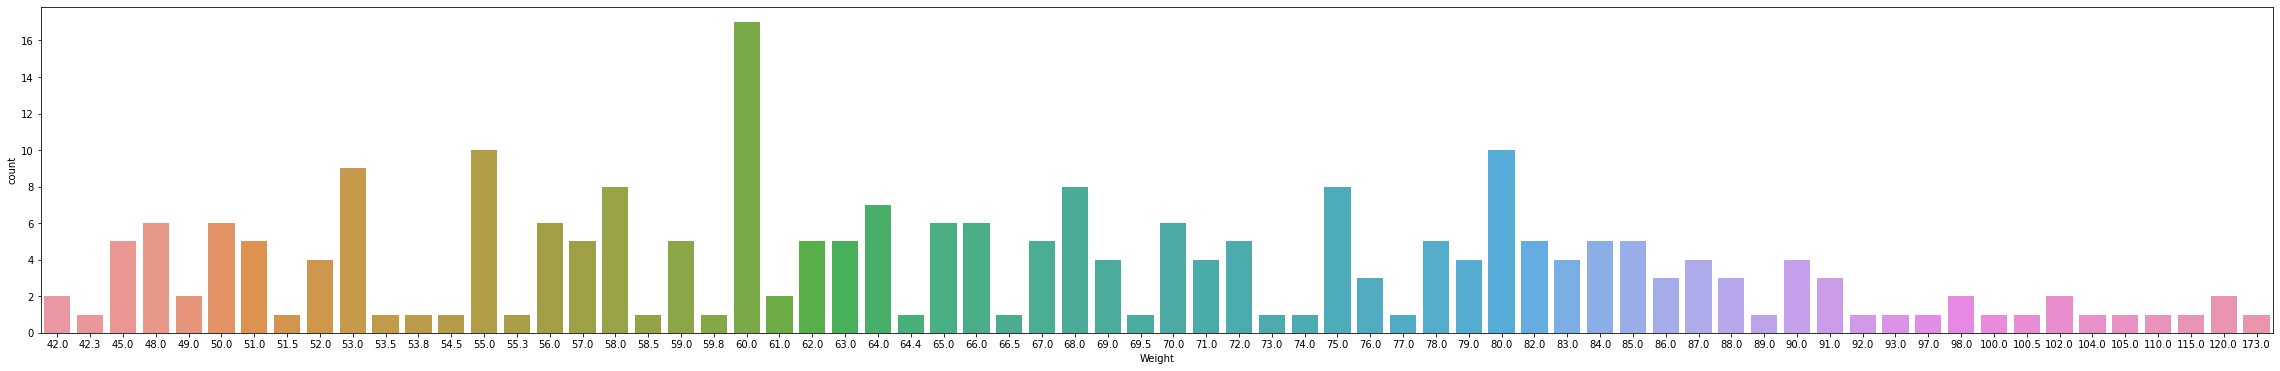

In [41]:
plt.figure(figsize=(40, 6))
sns.countplot(x="Weight", data=df)

### Ploting numerical features distribution

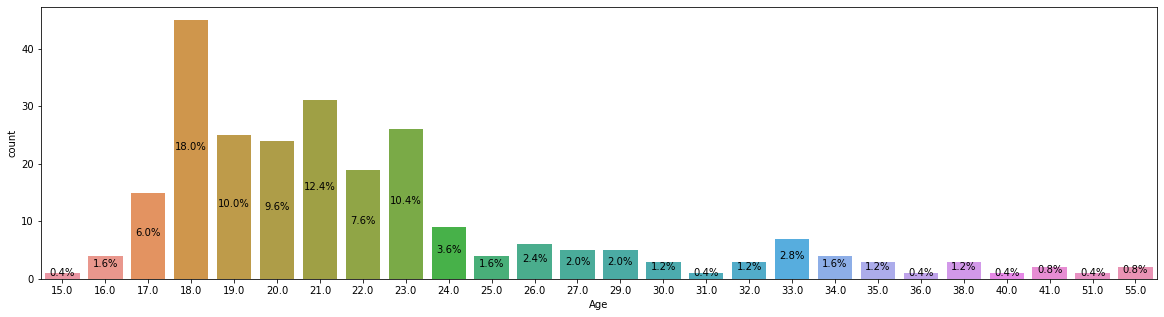

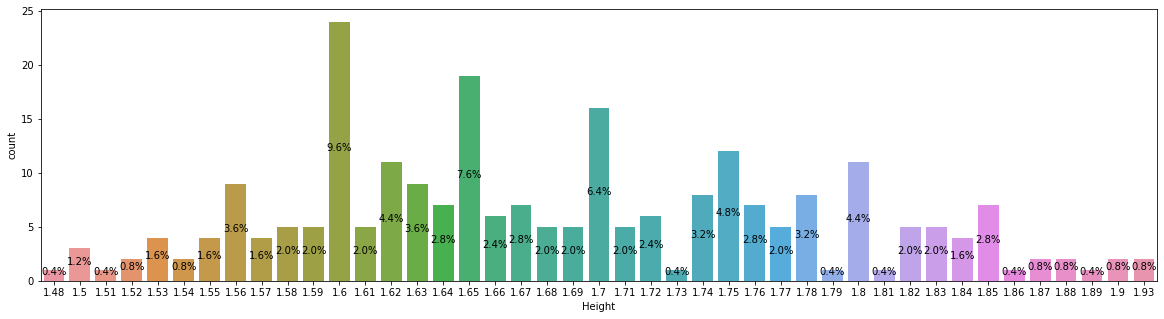

In [99]:
def print_countplots(dataframe,features,figsize):
    for col in features:
        plt.figure(figsize=figsize)
        ax = sns.countplot(x=col, data=dataframe, order=sorted(dataframe[col].unique()))
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/len(dataframe))
            x = p.get_x() + p.get_width()/2
            y = p.get_height()/2
            ax.annotate(percentage, (x, y), ha='center')

print_countplots(df.drop('Weight',axis=1),df.drop('Weight',axis=1).select_dtypes(['int64','float64']),(20, 5))

### Ploting the categorical features distribution

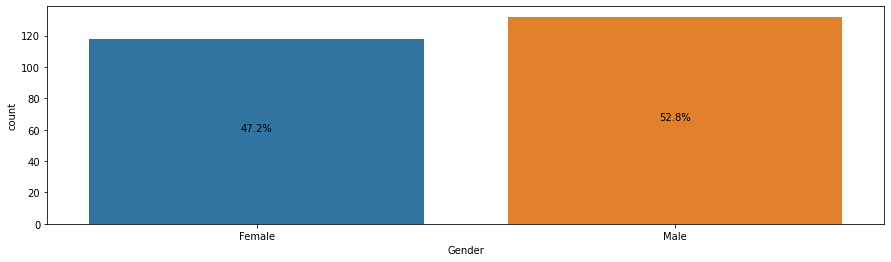

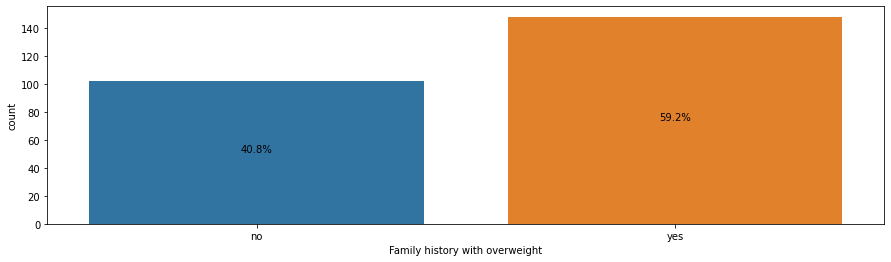

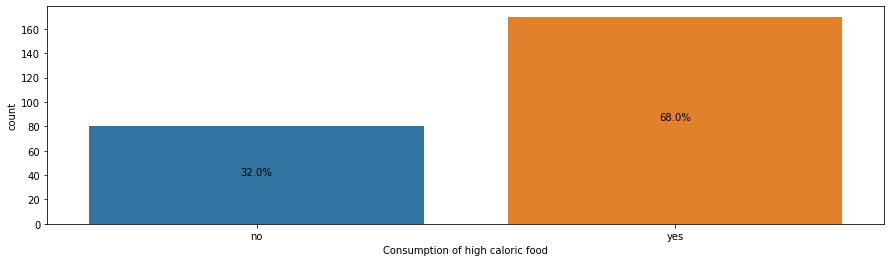

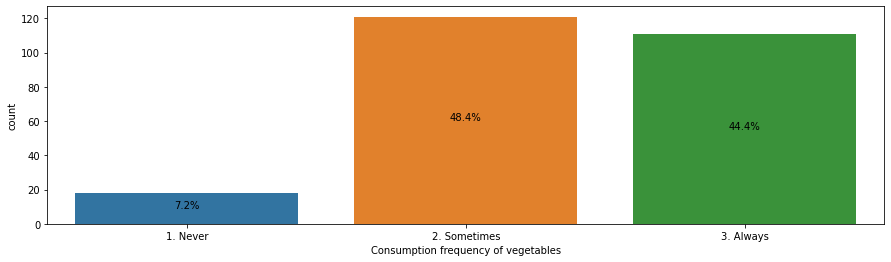

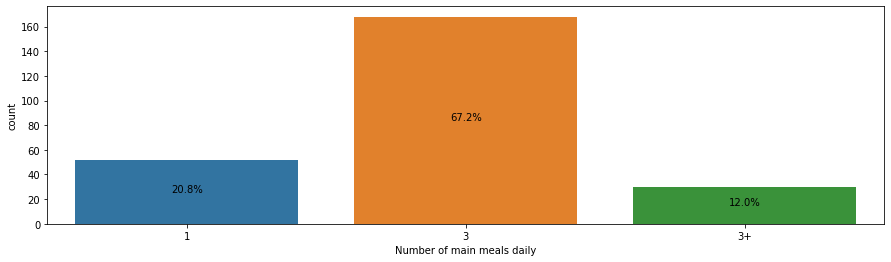

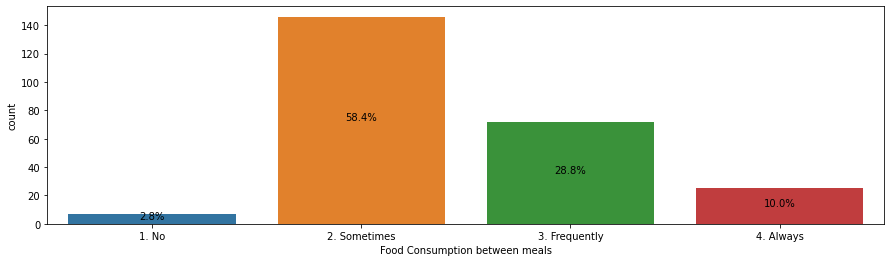

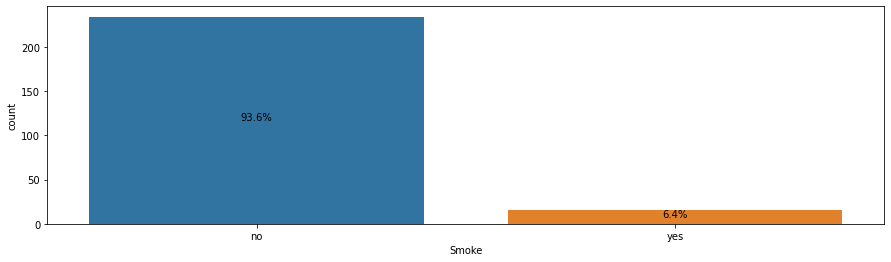

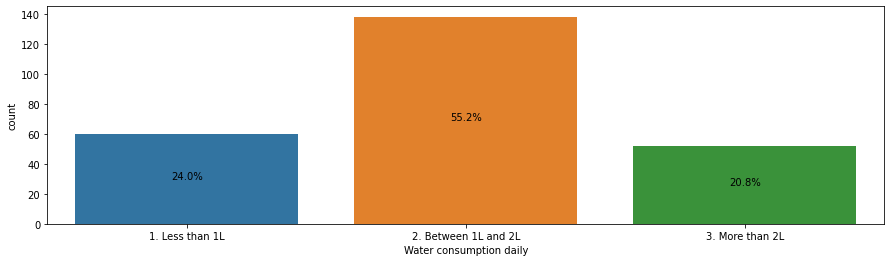

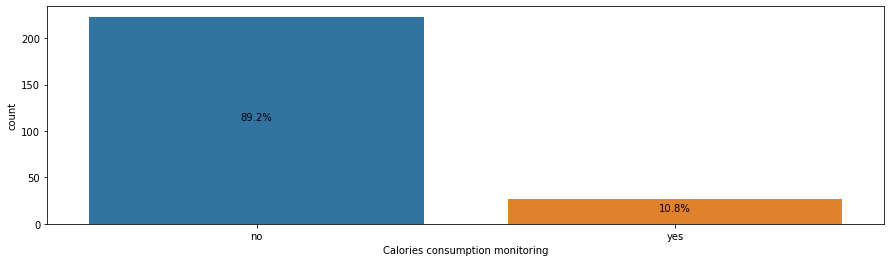

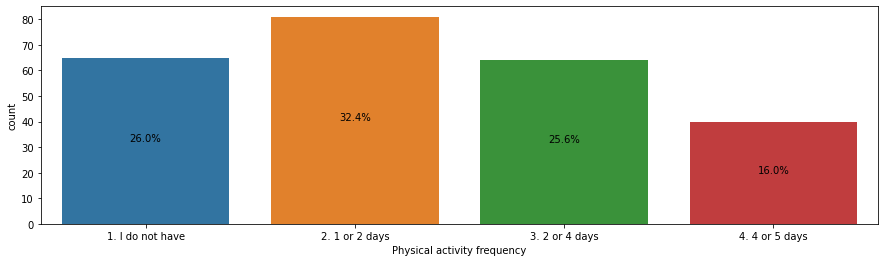

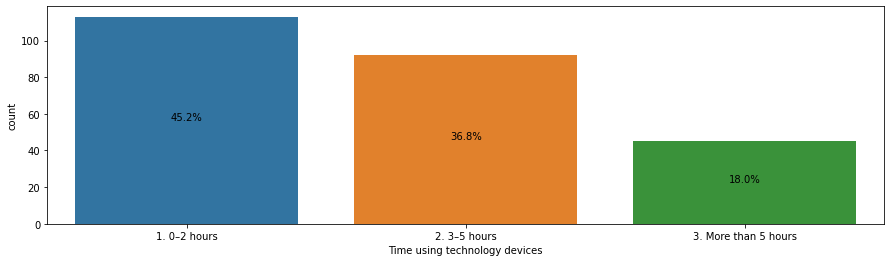

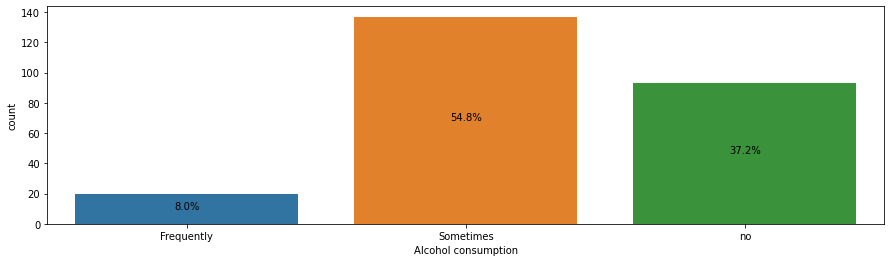

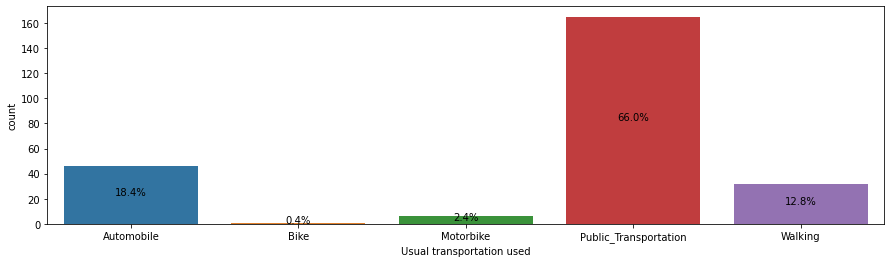

In [100]:
print_countplots(df,df.select_dtypes(['object']),(15, 4))

## Bivariate analysis

### Compare each categorical feature to the target feature Weight

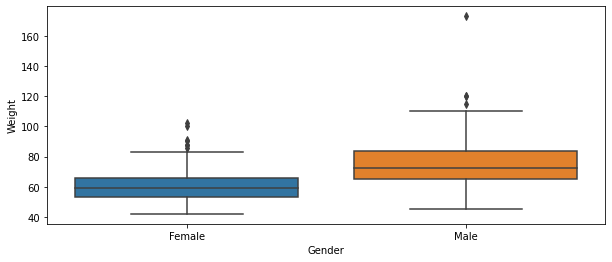

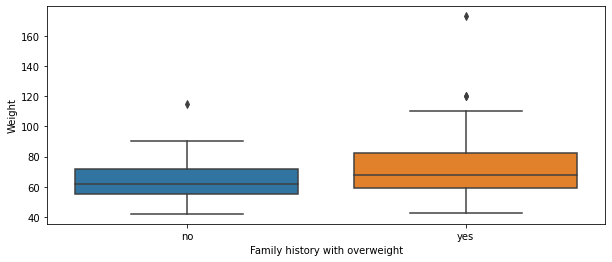

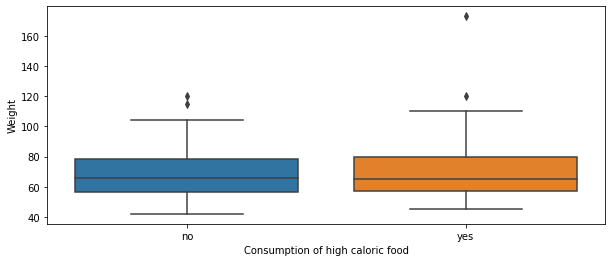

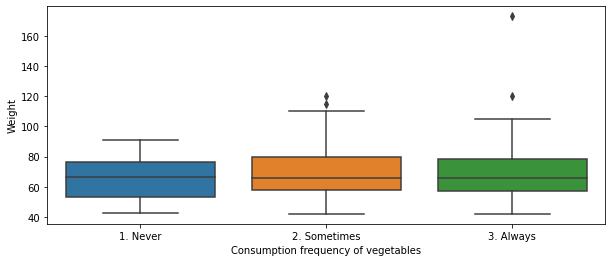

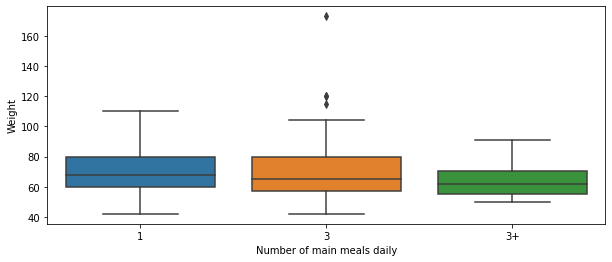

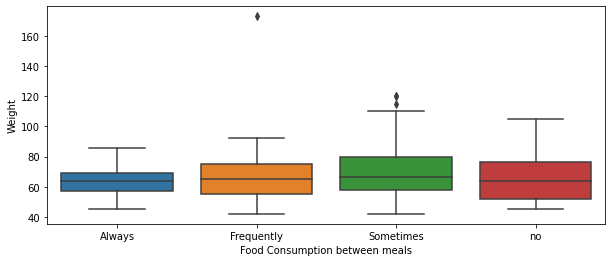

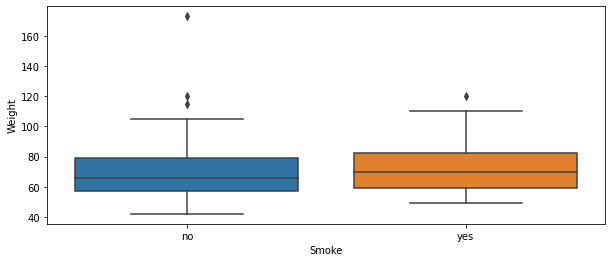

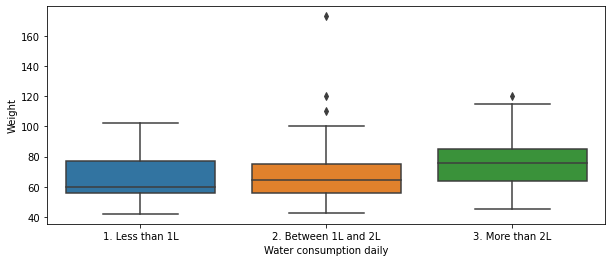

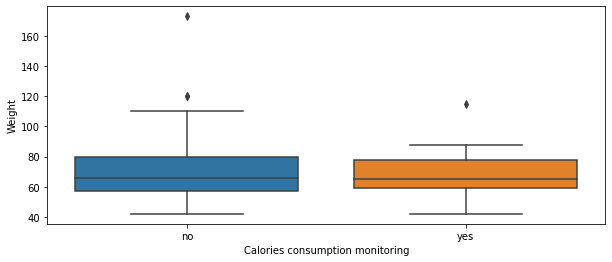

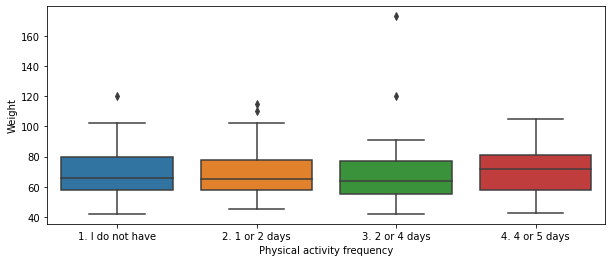

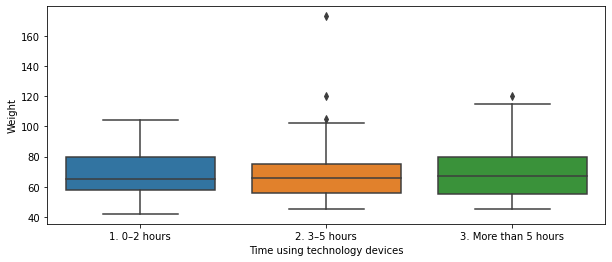

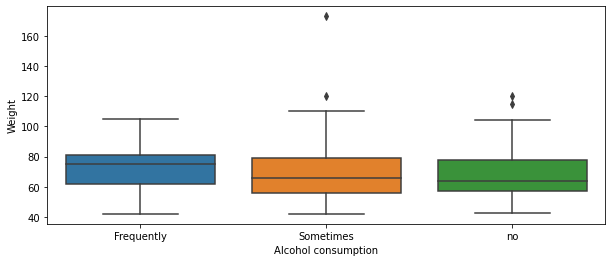

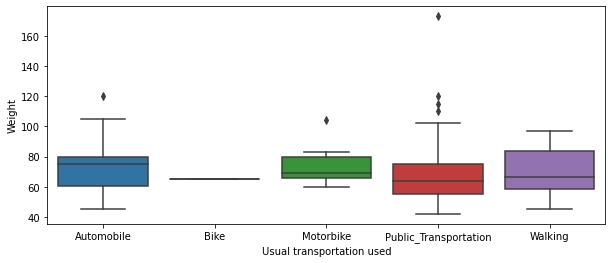

In [137]:
# Printing countplot for each categorical feature with percentage
def print_boxplot_to_y(dataframe, features,figsize,y='Weight'):
    for col in features:
        plt.figure(figsize=figsize)
        ax = sns.boxplot(x=col, y=y, data=dataframe,
                        order=sorted(dataframe[col].unique()))

print_boxplot_to_y(df,df.select_dtypes(['object']),(10, 4))

### Compare the Height to the Weight

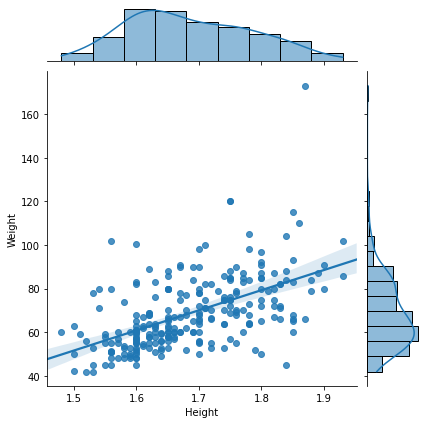

In [31]:
sns.jointplot(x="Height", y="Weight", data=df, kind="reg", truncate=False)

### Compare the Height to the Weight (with Male/Female hue)

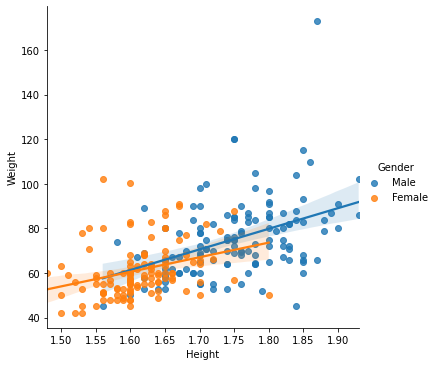

In [32]:
sns.lmplot(x="Height", y="Weight", hue="Gender", data=df)


### Compare the Age to Weight

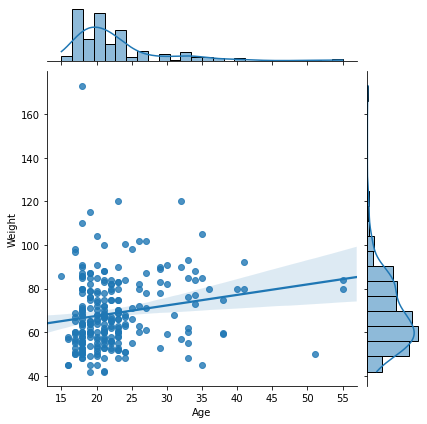

In [33]:
sns.jointplot(x="Age", y="Weight", data=df, kind="reg", truncate=False)

### Compare the Age to the Weight (with Male/Female hue)

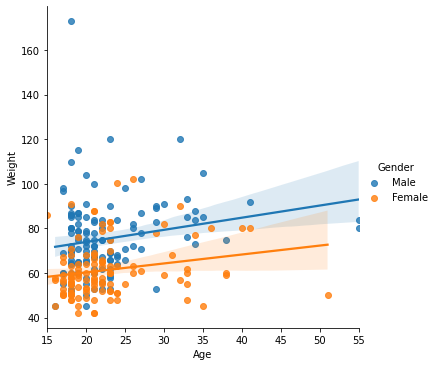

In [34]:
sns.lmplot(x="Age", y="Weight", hue="Gender", data=df)

In [9]:
df.head()

,Gender,Age,Height,Family history with overweight,Consumption of high caloric food,Consumption frequency of vegetables,Number of main meals daily,Food Consumption between meals,Smoke,Water consumption daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Alcohol consumption,Usual transportation used,Weight
0,Male,21.0,1.88,yes,yes,3. Always,3,Sometimes,no,3. More than 2L,no,3. 2 or 4 days,2. 3–5 hours,Sometimes,Walking,84.0
1,Male,19.0,1.70,yes,yes,2. Sometimes,1,Sometimes,no,2. Between 1L and 2L,no,3. 2 or 4 days,1. 0–2 hours,Sometimes,Public_Transportation,60.0
2,Male,18.0,1.86,yes,yes,2. Sometimes,1,Sometimes,yes,2. Between 1L and 2L,no,2. 1 or 2 days,3. More than 5 hours,Sometimes,Public_Transportation,110.0
3,Female,21.0,1.61,yes,yes,3. Always,3,Sometimes,no,3. More than 2L,no,1. I do not have,2. 3–5 hours,Sometimes,Walking,54.5
4,Female,22.0,1.61,yes,yes,3. Always,3,Frequently,no,3. More than 2L,no,2. 1 or 2 days,1. 0–2 hours,no,Public_Transportation,63.0


## Feature engineering

In [101]:
df_encode = df.copy()

ordinal_cat = ['Consumption frequency of vegetables', 'Number of main meals daily', 'Food Consumption between meals',
               'Water consumption daily', 'Physical activity frequency', 'Time using technology devices',
               'Alcohol consumption']
for cat in ordinal_cat:
    df_encode[cat] = df_encode[cat].map(lambda x: sorted(df_encode[cat].unique()).index(x)+1)

# Handling binary categorical features
df_encode[['Family history with overweight', 'Consumption of high caloric food', 'Smoke', 'Calories consumption monitoring']] = df_encode[[
    'Family history with overweight', 'Consumption of high caloric food', 'Smoke', 'Calories consumption monitoring']].replace(to_replace=['no', 'yes'], value=[0, 1])
df_encode[['Gender']] = df_encode[['Gender']].replace(
    to_replace=['Female', 'Male'], value=[0, 1])
df_encode[ordinal_cat] = df_encode[ordinal_cat].apply(lambda x : x**2)

#TODO log transform to Age


In [93]:
df

,Gender,Age,Height,Family history with overweight,Consumption of high caloric food,Consumption frequency of vegetables,Number of main meals daily,Food Consumption between meals,Smoke,Water consumption daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Alcohol consumption,Usual transportation used,Weight
0,Male,21.0,1.88,yes,yes,3. Always,3,Sometimes,no,3. More than 2L,no,3. 2 or 4 days,2. 3–5 hours,Sometimes,Walking,84.0
1,Male,19.0,1.70,yes,yes,2. Sometimes,1,Sometimes,no,2. Between 1L and 2L,no,3. 2 or 4 days,1. 0–2 hours,Sometimes,Public_Transportation,60.0
2,Male,18.0,1.86,yes,yes,2. Sometimes,1,Sometimes,yes,2. Between 1L and 2L,no,2. 1 or 2 days,3. More than 5 hours,Sometimes,Public_Transportation,110.0
3,Female,21.0,1.61,yes,yes,3. Always,3,Sometimes,no,3. More than 2L,no,1. I do not have,2. 3–5 hours,Sometimes,Walking,54.5
4,Female,22.0,1.61,yes,yes,3. Always,3,Frequently,no,3. More than 2L,no,2. 1 or 2 days,1. 0–2 hours,no,Public_Transportation,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Female,22.0,1.68,no,yes,3. Always,3,Frequently,no,2. Between 1L and 2L,no,1. I do not have,2. 3–5 hours,no,Public_Transportation,52.0
246,Male,23.0,1.65,no,no,3. Always,3,Sometimes,no,2. Between 1L and 2L,no,4. 4 or 5 days,1. 0–2 hours,no,Public_Transportation,66.0
247,Female,18.0,1.60,yes,yes,3. Always,1,Sometimes,no,1. Less than 1L,yes,1. I do not have,3. More than 5 hours,no,Walking,60.0
248,Female,36.0,1.65,yes,yes,2. Sometimes,3,Sometimes,no,1. Less than 1L,no,1. I do not have,3. More than 5 hours,no,Automobile,80.0


In [72]:
df_encode.head()

,Gender,Age,Height,Family history with overweight,Consumption of high caloric food,Consumption frequency of vegetables,Number of main meals daily,Food Consumption between meals,Smoke,Water consumption daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Alcohol consumption,Usual transportation used,Weight
0,1,21.0,1.88,1,1,3,2,3,0,3,0,3,2,2,Walking,84.0
1,1,19.0,1.70,1,1,2,1,3,0,2,0,3,1,2,Public_Transportation,60.0
2,1,18.0,1.86,1,1,2,1,3,1,2,0,2,3,2,Public_Transportation,110.0
3,0,21.0,1.61,1,1,3,2,3,0,3,0,1,2,2,Walking,54.5
4,0,22.0,1.61,1,1,3,2,2,0,3,0,2,1,3,Public_Transportation,63.0


In [109]:
df.head()

,Gender,Age,Height,Family history with overweight,Consumption of high caloric food,Consumption frequency of vegetables,Number of main meals daily,Food Consumption between meals,Smoke,Water consumption daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Alcohol consumption,Usual transportation used,Weight
0,Male,21.0,1.88,yes,yes,3. Always,3,2. Sometimes,no,3. More than 2L,no,3. 2 or 4 days,2. 3–5 hours,Sometimes,Walking,84.0
1,Male,19.0,1.70,yes,yes,2. Sometimes,1,2. Sometimes,no,2. Between 1L and 2L,no,3. 2 or 4 days,1. 0–2 hours,Sometimes,Public_Transportation,60.0
2,Male,18.0,1.86,yes,yes,2. Sometimes,1,2. Sometimes,yes,2. Between 1L and 2L,no,2. 1 or 2 days,3. More than 5 hours,Sometimes,Public_Transportation,110.0
3,Female,21.0,1.61,yes,yes,3. Always,3,2. Sometimes,no,3. More than 2L,no,1. I do not have,2. 3–5 hours,Sometimes,Walking,54.5
4,Female,22.0,1.61,yes,yes,3. Always,3,3. Frequently,no,3. More than 2L,no,2. 1 or 2 days,1. 0–2 hours,no,Public_Transportation,63.0


In [103]:
df_encode['Food habits'] = df_encode.apply(lambda x : -x['Consumption frequency of vegetables']+x['Food Consumption between meals']+x['Number of main meals daily'],axis=1)

In [78]:
df_encode['Livestyle'] = df_encode.apply(lambda x : x['Alcohol consumption']+x['Time using technology devices']-x['Physical activity frequency'],axis=1)

In [105]:
df_encode

,Gender,Age,Height,Family history with overweight,Consumption of high caloric food,Consumption frequency of vegetables,Number of main meals daily,Food Consumption between meals,Smoke,Water consumption daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Alcohol consumption,Usual transportation used,Weight,Food habits
0,1,21.0,1.88,1,1,9,4,4,0,9,0,9,4,4,Walking,84.0,-1
1,1,19.0,1.70,1,1,4,1,4,0,4,0,9,1,4,Public_Transportation,60.0,1
2,1,18.0,1.86,1,1,4,1,4,1,4,0,4,9,4,Public_Transportation,110.0,1
3,0,21.0,1.61,1,1,9,4,4,0,9,0,1,4,4,Walking,54.5,-1
4,0,22.0,1.61,1,1,9,4,9,0,9,0,4,1,9,Public_Transportation,63.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,22.0,1.68,0,1,9,4,9,0,4,0,1,4,9,Public_Transportation,52.0,4
246,1,23.0,1.65,0,0,9,4,4,0,4,0,16,1,9,Public_Transportation,66.0,-1
247,0,18.0,1.60,1,1,9,1,4,0,1,1,1,9,9,Walking,60.0,-4
248,0,36.0,1.65,1,1,4,4,4,0,1,0,1,9,9,Automobile,80.0,4


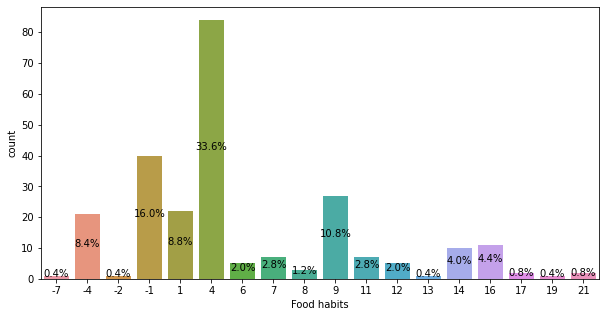

In [108]:
print_countplots(df_encode,['Food habits'],(10,5))

In [102]:
abs(df_encode.corr()['Weight']).sort_values(0, False)[1:]

Height                                 0.544798
Gender                                 0.423788
Family history with overweight         0.220832
Water consumption daily                0.200046
Age                                    0.181265
Food Consumption between meals         0.104493
Number of main meals daily             0.088824
Alcohol consumption                    0.083435
Smoke                                  0.073669
Time using technology devices          0.039966
Physical activity frequency            0.029566
Consumption of high caloric food       0.026312
Consumption frequency of vegetables    0.020451
Calories consumption monitoring        0.008243
Name: Weight, dtype: float64

In [104]:
abs(df_encode.corr()['Weight']).sort_values(0, False)[1:]

Height                                 0.544798
Gender                                 0.423788
Family history with overweight         0.220832
Water consumption daily                0.200046
Age                                    0.181265
Food habits                            0.117713
Food Consumption between meals         0.104493
Number of main meals daily             0.088824
Alcohol consumption                    0.083435
Smoke                                  0.073669
Time using technology devices          0.039966
Physical activity frequency            0.029566
Consumption of high caloric food       0.026312
Consumption frequency of vegetables    0.020451
Calories consumption monitoring        0.008243
Name: Weight, dtype: float64

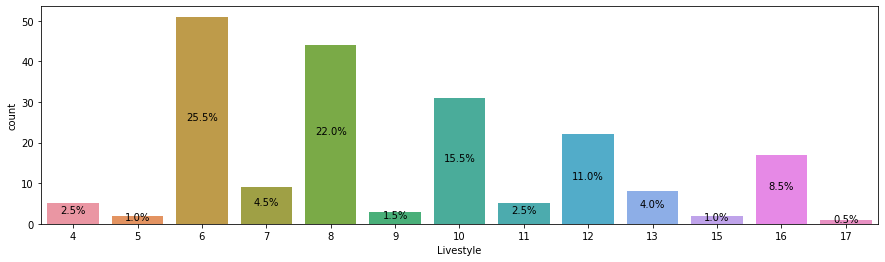

In [71]:
print_countplots(df_encode,['Livestyle'],(15, 4))

## Data augmentation

In [85]:
#IMPORTS
from imblearn.over_sampling import SMOTE, ADASYN,BorderlineSMOTE,SMOTENC,RandomOverSampler
import smogn

### Data encoding

In [10]:
df_encode = df.copy()

ordinal_cat = ['Consumption frequency of vegetables', 'Number of main meals daily', 'Food Consumption between meals',
               'Water consumption daily', 'Physical activity frequency', 'Time using technology devices',
               'Alcohol consumption']
for cat in ordinal_cat:
    df_encode[cat] = df_encode[cat].map(lambda x: sorted(df_encode[cat].unique()).index(x)+1)

# Handling binary categorical features
df_encode[['Family history with overweight', 'Consumption of high caloric food', 'Smoke', 'Calories consumption monitoring']] = df_encode[[
    'Family history with overweight', 'Consumption of high caloric food', 'Smoke', 'Calories consumption monitoring']].replace(to_replace=['no', 'yes'], value=[0, 1])
df_encode[['Gender']] = df_encode[['Gender']].replace(
    to_replace=['Female', 'Male'], value=[0, 1])

#TODO log transform to Age

df_encode = pd.get_dummies(df_encode)


In [109]:
df_encode.head()

,Gender,Age,Height,Family history with overweight,Consumption of high caloric food,Consumption frequency of vegetables,Number of main meals daily,Food Consumption between meals,Smoke,Water consumption daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Alcohol consumption,Weight,Usual transportation used_Automobile,Usual transportation used_Bike,Usual transportation used_Motorbike,Usual transportation used_Public_Transportation,Usual transportation used_Walking
0,1,21.0,1.88,1,1,3,2,3,0,3,0,3,2,2,84.0,0,0,0,0,1
1,1,19.0,1.70,1,1,2,1,3,0,2,0,3,1,2,60.0,0,0,0,1,0
2,1,18.0,1.86,1,1,2,1,3,1,2,0,2,3,2,110.0,0,0,0,1,0
3,0,21.0,1.61,1,1,3,2,3,0,3,0,1,2,2,54.5,0,0,0,0,1
4,0,22.0,1.61,1,1,3,2,2,0,3,0,2,1,3,63.0,0,0,0,1,0


In [64]:
# Removing the outliers
# for col in ['Age', 'Height', 'Weight']:
#     upper_lim = df_augment[col].quantile(.95)
#     lower_lim = df_augment[col].quantile(.05)

#     df_augment.loc[(df_augment[col] > upper_lim), col] = np.nan
#     df_augment.loc[(df_augment[col] < lower_lim), col] = np.nan

# df_augment.dropna(inplace=True)

### Regression

In [110]:
df_resampled_reg = smogn.smoter(
    data = df_encode, 
    y = "Weight",
    k = 7,                    ## positive integer (k < n)
    pert = 0.04,              ## real number (0 < R < 1)
    samp_method = 'extreme'   ## string ('balance' or 'extreme')
    )
df_resampled_reg.drop_duplicates(inplace=True)

r_index: 100%|##########| 9/9 [00:00<00:00, 131.47it/s]


In [114]:
df_resampled_reg.reset_index(drop=True,inplace=True)
df_resampled_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Gender                                           428 non-null    int64  
 1   Age                                              428 non-null    float64
 2   Height                                           428 non-null    float64
 3   Family history with overweight                   428 non-null    int64  
 4   Consumption of high caloric food                 428 non-null    int64  
 5   Consumption frequency of vegetables              428 non-null    int64  
 6   Number of main meals daily                       428 non-null    int64  
 7   Food Consumption between meals                   428 non-null    int64  
 8   Smoke                                            428 non-null    int64  
 9   Water consumption daily         

In [115]:
abs(df_resampled_reg.corr()['Weight']).sort_values(0, False)[1:]

Height                                             0.499386
Number of main meals daily                         0.365566
Alcohol consumption                                0.277387
Physical activity frequency                        0.168987
Consumption frequency of vegetables                0.156935
Gender                                             0.156217
Usual transportation used_Public_Transportation    0.152545
Usual transportation used_Walking                  0.144458
Calories consumption monitoring                    0.136208
Consumption of high caloric food                   0.123243
Age                                                0.094165
Water consumption daily                            0.090599
Family history with overweight                     0.078087
Usual transportation used_Automobile               0.072904
Usual transportation used_Bike                     0.037664
Smoke                                              0.032377
Time using technology devices           

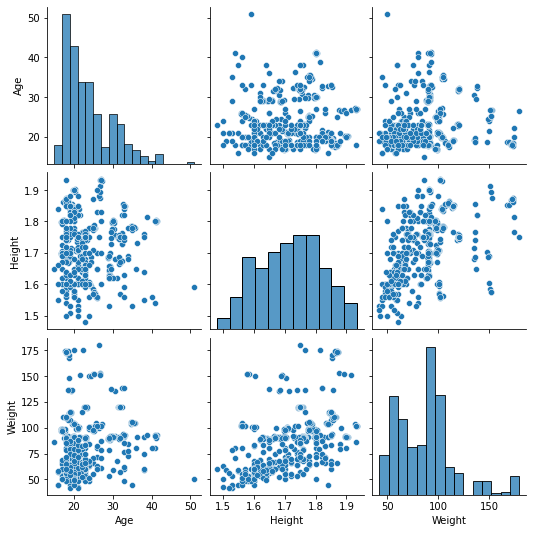

In [116]:
sns.pairplot(df_resampled_reg[['Age','Height','Weight']])

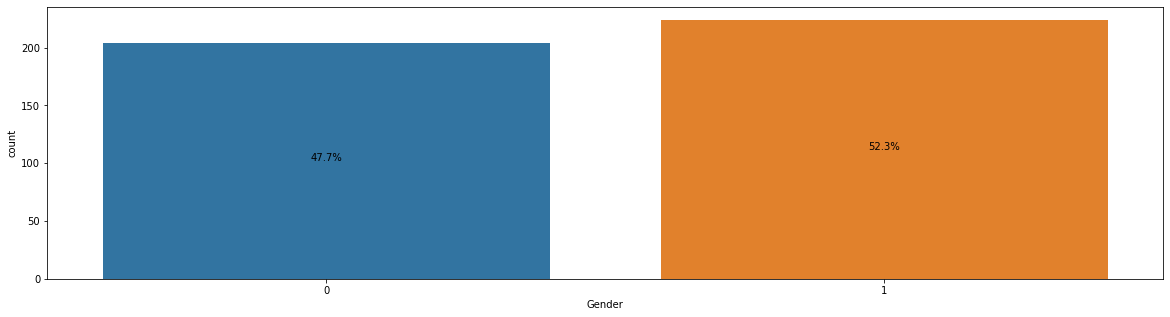

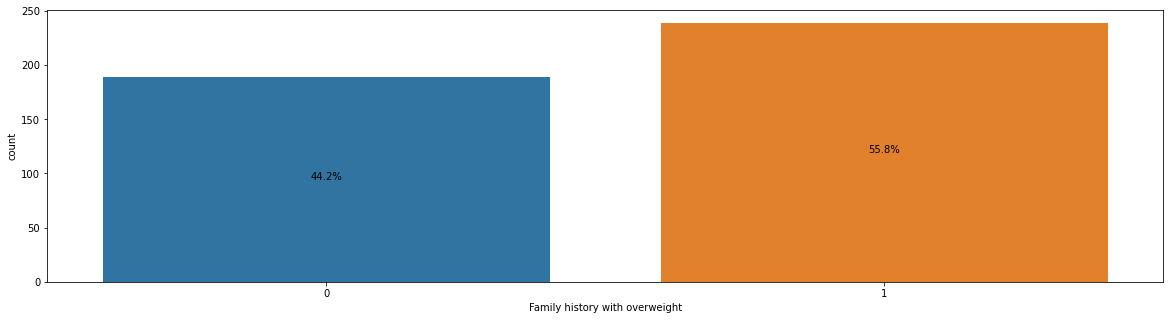

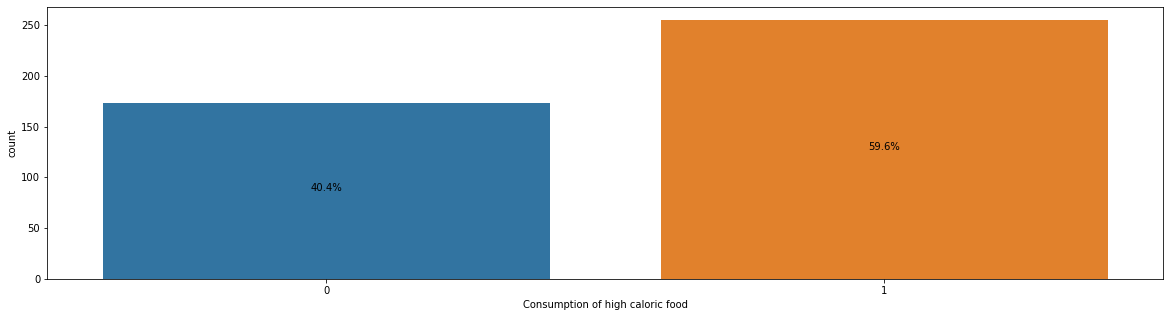

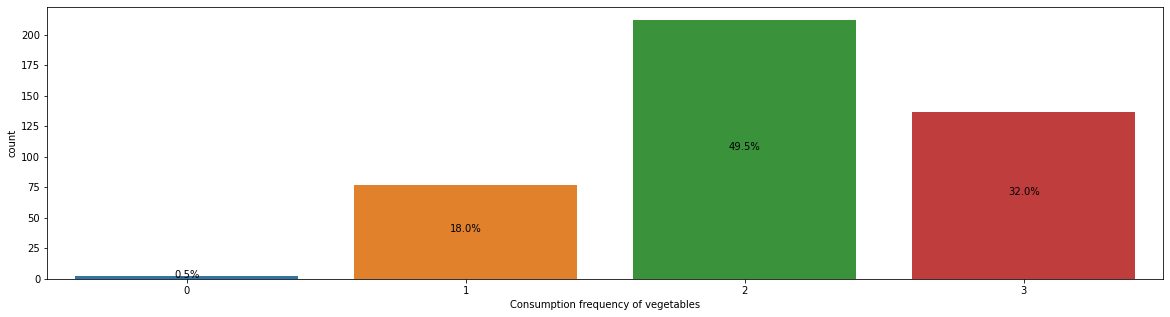

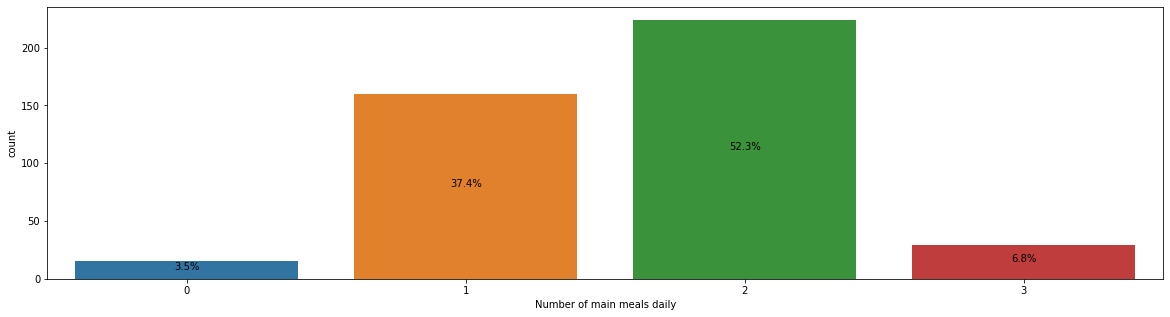

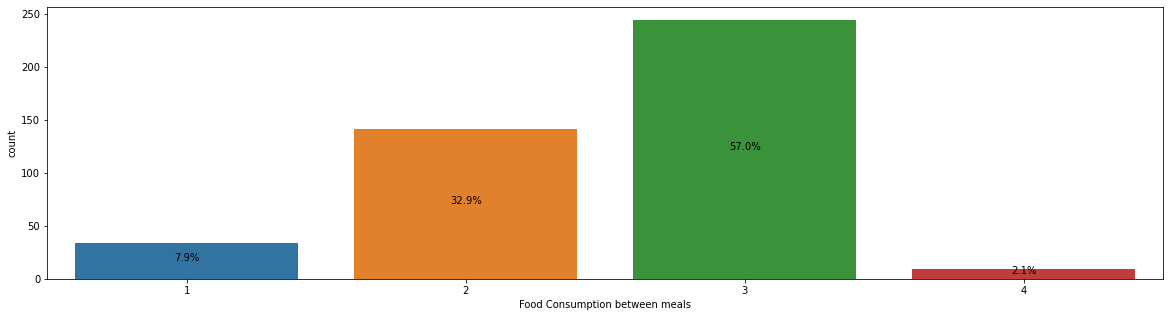

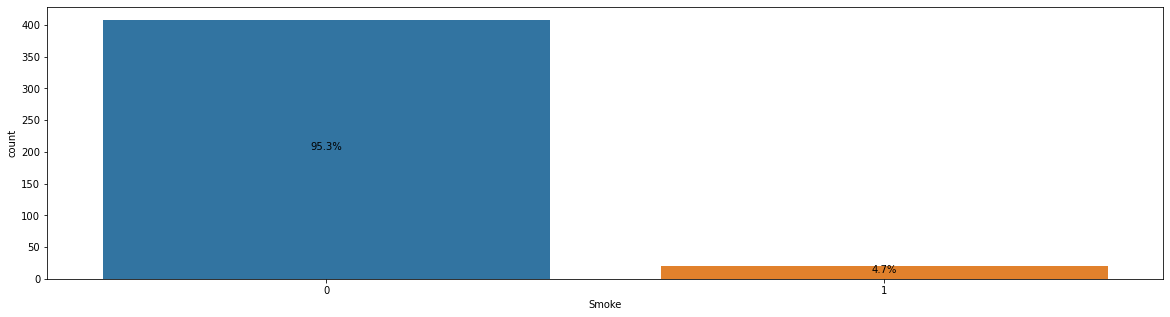

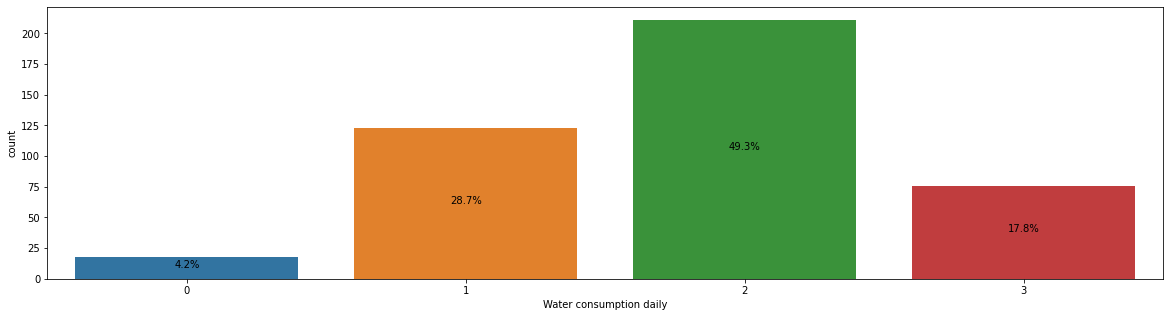

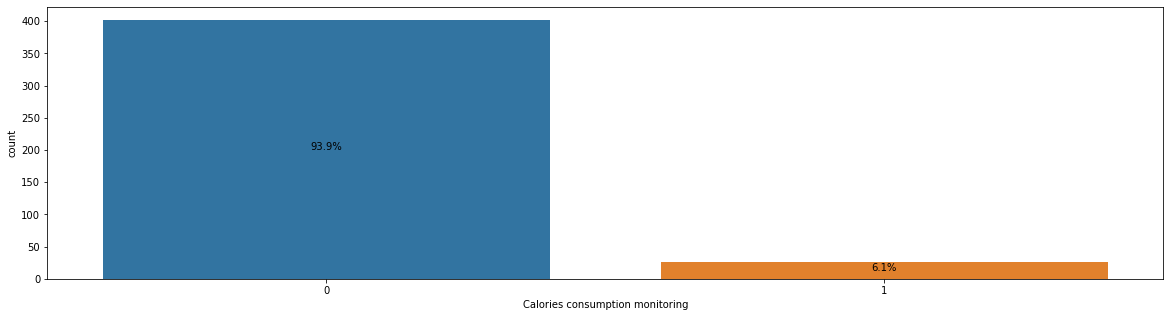

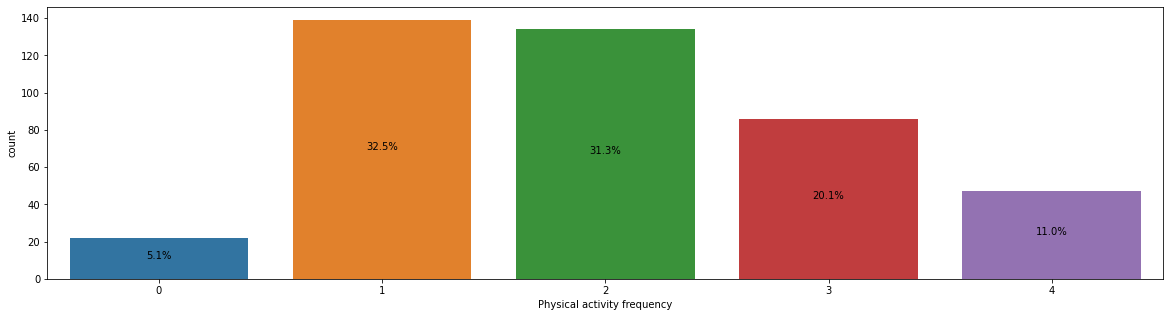

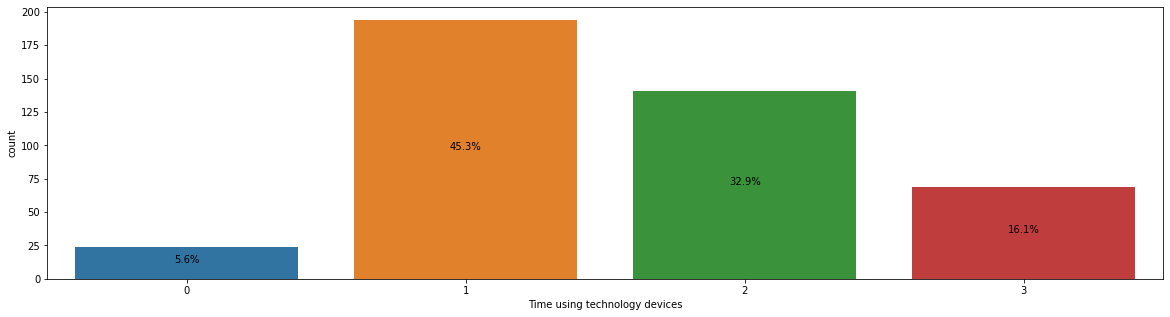

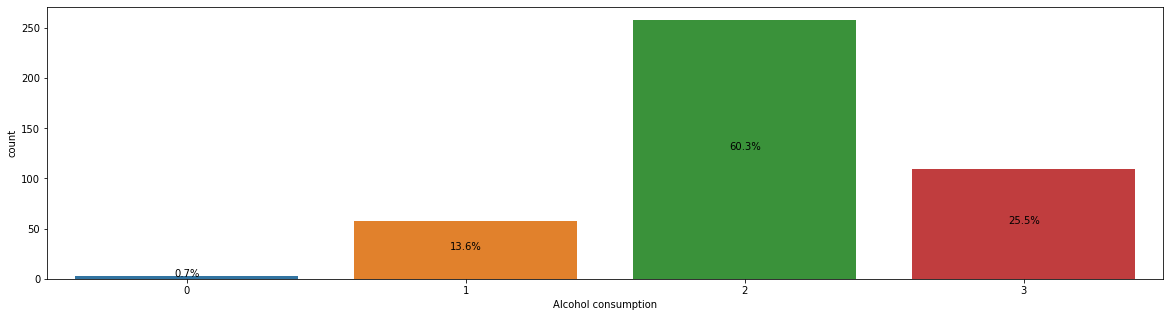

In [118]:
print_countplots(df_resampled_reg,df_resampled_reg.select_dtypes('int64'),(20,5))

### Categorical

In [119]:
df_class = df_encode.copy()

def get_label(height, weight):
    bmi = weight/height**2
    if 0 < bmi < 18.5:
        return 1
    if 18.5 < bmi < 25.0:
        return 2
    if 25.0 < bmi < 30.0:
        return 3
    if bmi >=30.0:
        return 4

df_class['label'] = df_class.apply(lambda x : get_label(x['Height'],x['Weight']),axis=1)
df_class.drop('Weight', inplace=True,axis=1)

In [120]:
df_class

,Gender,Age,Height,Family history with overweight,Consumption of high caloric food,Consumption frequency of vegetables,Number of main meals daily,Food Consumption between meals,Smoke,Water consumption daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Alcohol consumption,Usual transportation used_Automobile,Usual transportation used_Bike,Usual transportation used_Motorbike,Usual transportation used_Public_Transportation,Usual transportation used_Walking,label
0,1,21.0,1.88,1,1,3,2,3,0,3,0,3,2,2,0,0,0,0,1,2
1,1,19.0,1.70,1,1,2,1,3,0,2,0,3,1,2,0,0,0,1,0,2
2,1,18.0,1.86,1,1,2,1,3,1,2,0,2,3,2,0,0,0,1,0,4
3,0,21.0,1.61,1,1,3,2,3,0,3,0,1,2,2,0,0,0,0,1,2
4,0,22.0,1.61,1,1,3,2,2,0,3,0,2,1,3,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,22.0,1.68,0,1,3,2,2,0,2,0,1,2,3,0,0,0,1,0,1
246,1,23.0,1.65,0,0,3,2,3,0,2,0,4,1,3,0,0,0,1,0,2
247,0,18.0,1.60,1,1,3,1,3,0,1,1,1,3,3,0,0,0,0,1,2
248,0,36.0,1.65,1,1,2,2,3,0,1,0,1,3,3,1,0,0,0,0,3


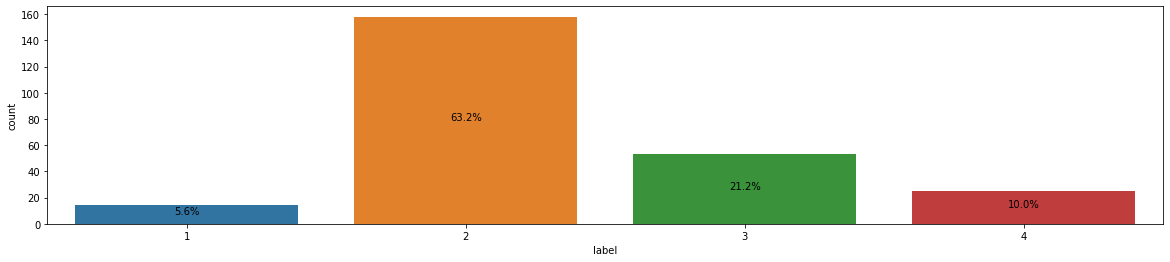

In [121]:
print_countplots(df_class,['label'],(20,4))

In [ ]:
X = df_class.drop('label', axis=1)
y = df_class['label']

#### SMOTE

In [129]:
sm = SMOTE(random_state=42,k_neighbors=math.ceil(sum(y) * 0.01))
X_res, y_res = sm.fit_resample(X, y)
df_resampled_smote = pd.concat([X_res,y_res],axis=1)
df_resampled_smote.drop_duplicates(inplace=True)

In [132]:
df_resampled_smote

,Gender,Age,Height,Family history with overweight,Consumption of high caloric food,Consumption frequency of vegetables,Number of main meals daily,Food Consumption between meals,Smoke,Water consumption daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Alcohol consumption,Usual transportation used_Automobile,Usual transportation used_Bike,Usual transportation used_Motorbike,Usual transportation used_Public_Transportation,Usual transportation used_Walking,label
0,1,21.000000,1.880000,1,1,3,2,3,0,3,0,3,2,2,0,0,0,0,1,2
1,1,19.000000,1.700000,1,1,2,1,3,0,2,0,3,1,2,0,0,0,1,0,2
2,1,18.000000,1.860000,1,1,2,1,3,1,2,0,2,3,2,0,0,0,1,0,4
3,0,21.000000,1.610000,1,1,3,2,3,0,3,0,1,2,2,0,0,0,0,1,2
4,0,22.000000,1.610000,1,1,3,2,2,0,3,0,2,1,3,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,0,22.661501,1.600000,1,1,1,1,3,0,1,0,1,3,2,0,0,0,1,0,4
628,0,23.447235,1.682915,1,1,2,1,3,0,1,0,2,2,2,0,0,0,1,0,4
629,0,23.427708,1.685844,1,1,2,1,3,0,1,0,2,2,2,0,0,0,1,0,4
630,0,23.980332,1.602950,1,1,2,1,3,0,1,0,1,2,2,0,0,0,1,0,4


In [133]:
abs(df_resampled_smote.corr()['label']).sort_values(0, False)[1:]

Family history with overweight                     0.430070
Number of main meals daily                         0.401351
Age                                                0.313631
Consumption frequency of vegetables                0.209486
Consumption of high caloric food                   0.161282
Food Consumption between meals                     0.119376
Usual transportation used_Public_Transportation    0.112904
Physical activity frequency                        0.110095
Calories consumption monitoring                    0.102288
Usual transportation used_Walking                  0.092945
Smoke                                              0.086789
Water consumption daily                            0.086336
Usual transportation used_Automobile               0.084401
Height                                             0.064416
Alcohol consumption                                0.060768
Time using technology devices                      0.060126
Gender                                  

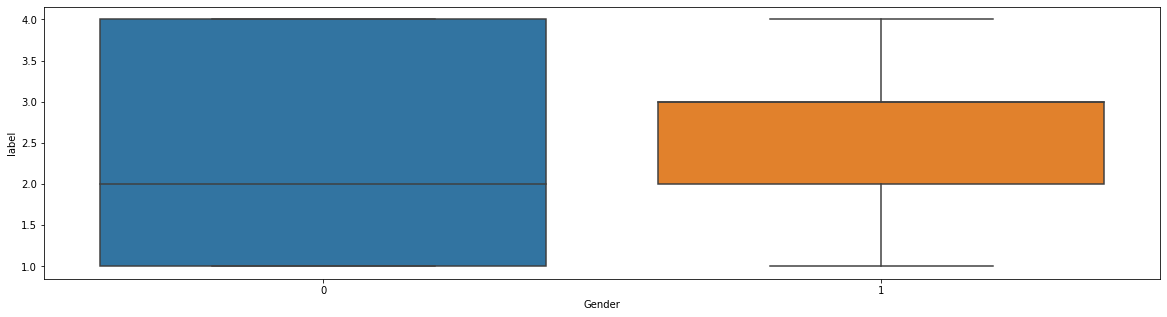

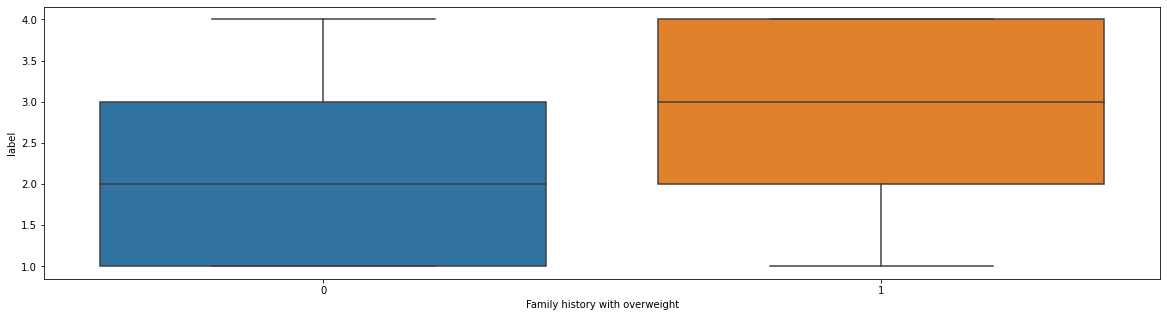

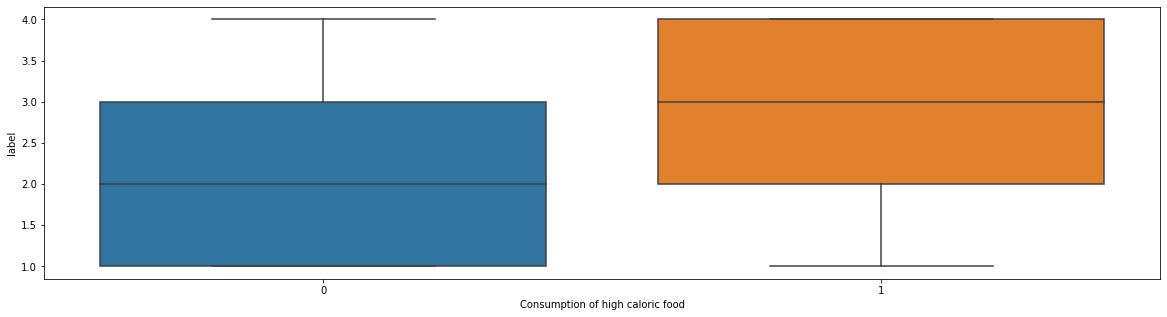

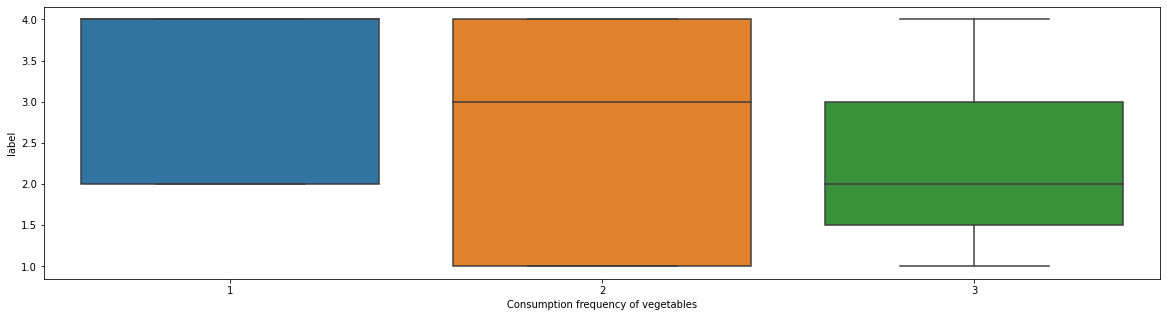

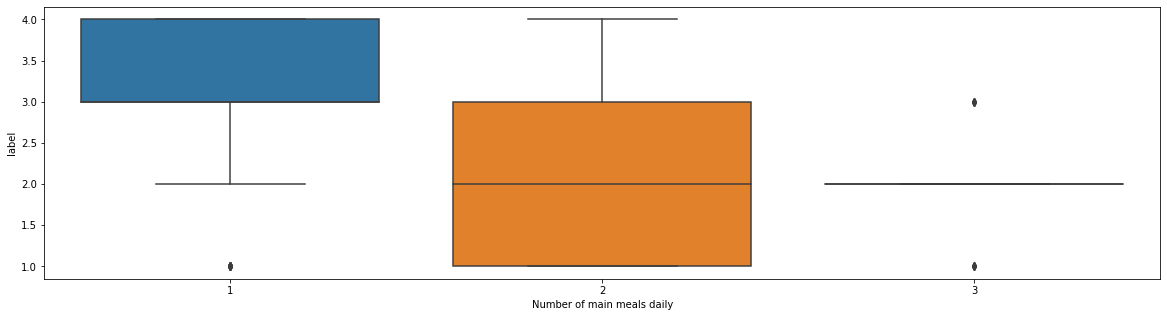

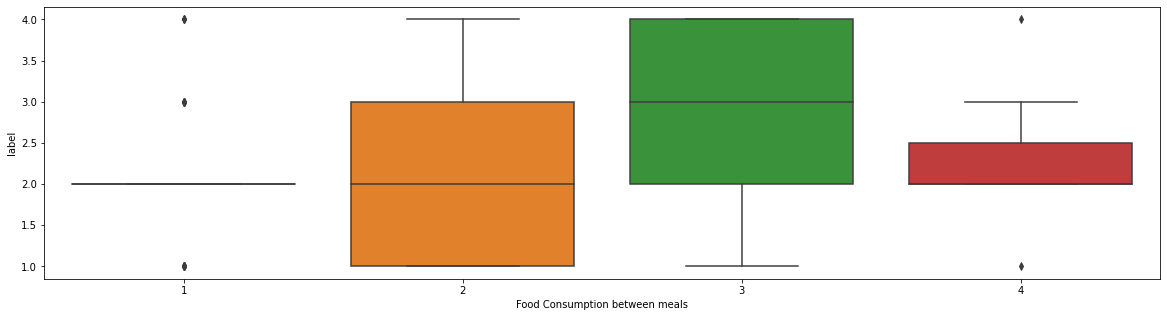

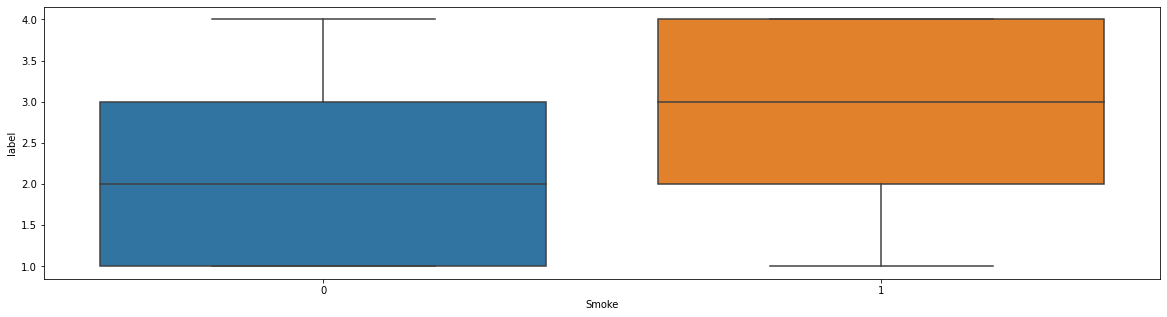

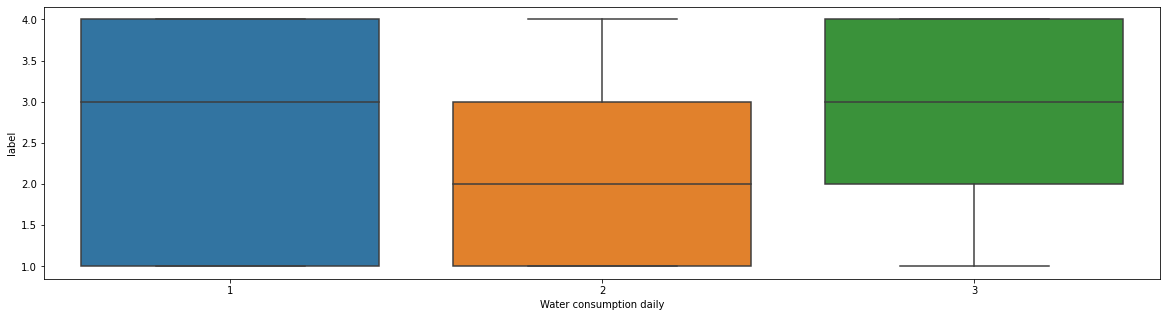

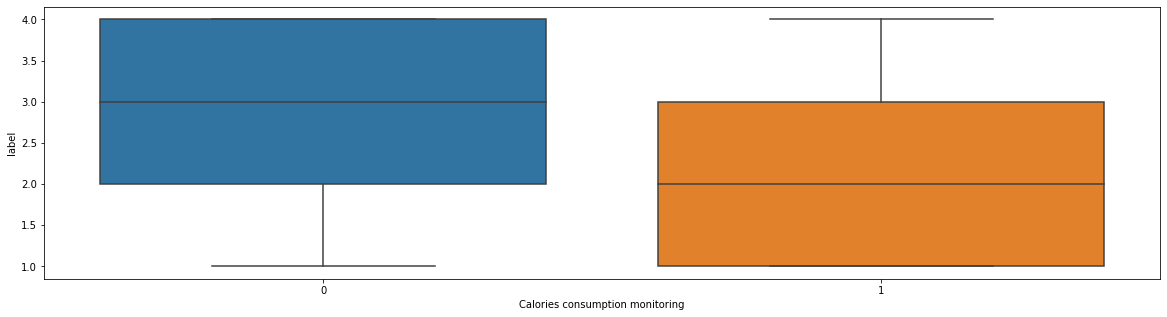

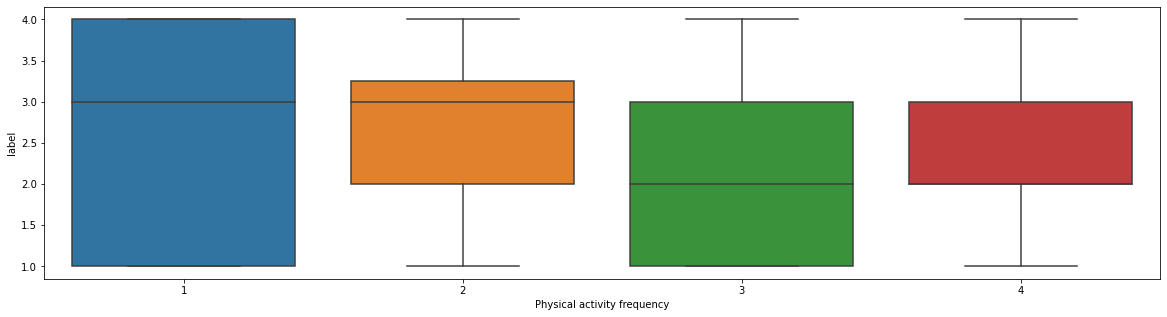

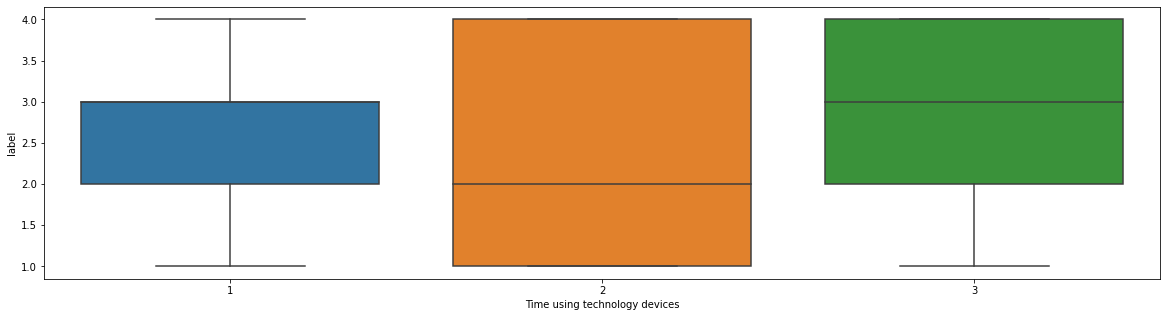

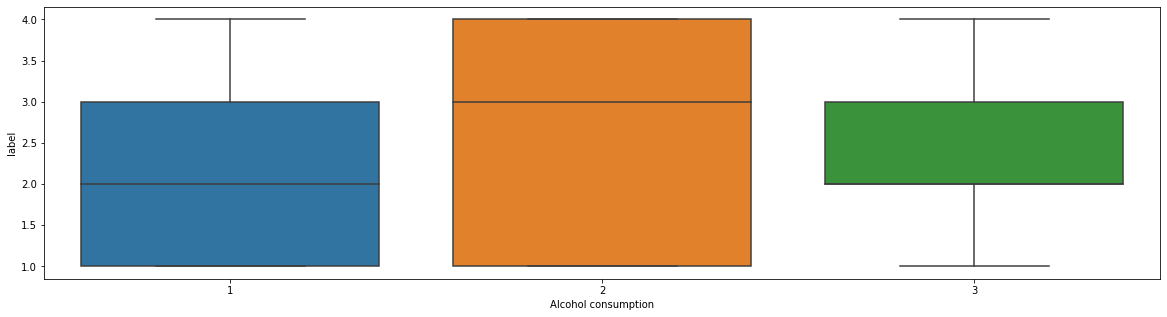

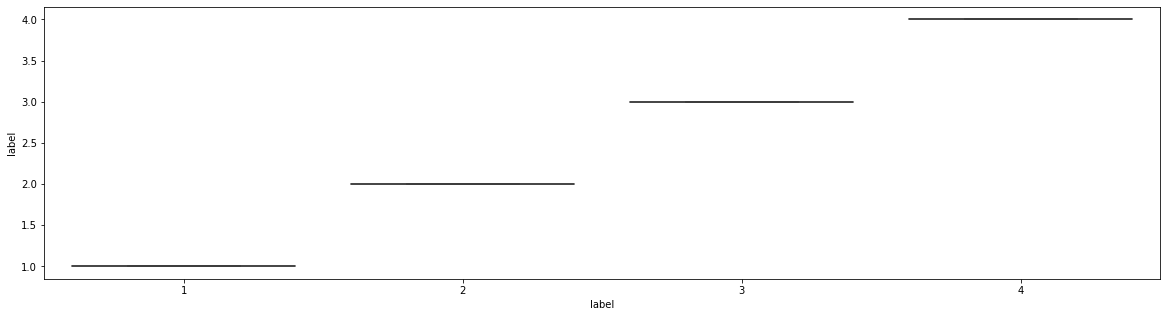

In [139]:
print_boxplot_to_y(df_resampled_smote,df_resampled_smote.select_dtypes('int64'),(20,5),'label')

#### Borderline SMOTE

In [140]:
sm = BorderlineSMOTE(random_state=42,k_neighbors=math.ceil(sum(y) * 0.01))
X_res, y_res = sm.fit_resample(X, y)
df_resampled_border = pd.concat([X_res,y_res],axis=1)
df_resampled_border.drop_duplicates(inplace=True)

In [141]:
df_resampled_border

,Gender,Age,Height,Family history with overweight,Consumption of high caloric food,Consumption frequency of vegetables,Number of main meals daily,Food Consumption between meals,Smoke,Water consumption daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Alcohol consumption,Usual transportation used_Automobile,Usual transportation used_Bike,Usual transportation used_Motorbike,Usual transportation used_Public_Transportation,Usual transportation used_Walking,label
0,1,21.000000,1.880000,1,1,3,2,3,0,3,0,3,2,2,0,0,0,0,1,2
1,1,19.000000,1.700000,1,1,2,1,3,0,2,0,3,1,2,0,0,0,1,0,2
2,1,18.000000,1.860000,1,1,2,1,3,1,2,0,2,3,2,0,0,0,1,0,4
3,0,21.000000,1.610000,1,1,3,2,3,0,3,0,1,2,2,0,0,0,0,1,2
4,0,22.000000,1.610000,1,1,3,2,2,0,3,0,2,1,3,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,1,32.452330,1.754523,1,0,3,1,3,0,3,0,1,2,2,1,0,0,0,0,4
628,0,23.315226,1.600000,1,1,2,1,3,0,1,0,1,3,2,0,0,0,1,0,4
629,0,34.180297,1.534317,0,1,2,1,2,0,1,0,1,1,2,1,0,0,0,0,4
630,0,38.969578,1.557190,0,1,2,1,3,0,2,0,2,1,3,0,0,0,0,0,4


In [143]:
abs(df_resampled_border.corr()['label']).sort_values(0, False)[1:]

Family history with overweight                     0.472265
Age                                                0.408179
Number of main meals daily                         0.379258
Consumption of high caloric food                   0.316547
Consumption frequency of vegetables                0.296068
Gender                                             0.198393
Usual transportation used_Public_Transportation    0.196200
Time using technology devices                      0.168220
Height                                             0.163488
Calories consumption monitoring                    0.153634
Physical activity frequency                        0.136900
Water consumption daily                            0.125479
Usual transportation used_Automobile               0.110424
Usual transportation used_Walking                  0.096384
Alcohol consumption                                0.094249
Smoke                                              0.042426
Food Consumption between meals          

#### ADASYN

In [145]:
sm = ADASYN(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
df_resampled_adasyn = pd.concat([X_res,y_res],axis=1)
df_resampled_adasyn.drop_duplicates(inplace=True)

In [146]:
df_resampled_adasyn

,Gender,Age,Height,Family history with overweight,Consumption of high caloric food,Consumption frequency of vegetables,Number of main meals daily,Food Consumption between meals,Smoke,Water consumption daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Alcohol consumption,Usual transportation used_Automobile,Usual transportation used_Bike,Usual transportation used_Motorbike,Usual transportation used_Public_Transportation,Usual transportation used_Walking,label
0,1,21.000000,1.880000,1,1,3,2,3,0,3,0,3,2,2,0,0,0,0,1,2
1,1,19.000000,1.700000,1,1,2,1,3,0,2,0,3,1,2,0,0,0,1,0,2
2,1,18.000000,1.860000,1,1,2,1,3,1,2,0,2,3,2,0,0,0,1,0,4
3,0,21.000000,1.610000,1,1,3,2,3,0,3,0,1,2,2,0,0,0,0,1,2
4,0,22.000000,1.610000,1,1,3,2,2,0,3,0,2,1,3,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,0,23.000000,1.744754,1,1,2,2,2,0,2,0,3,1,2,0,0,0,1,0,4
647,0,22.627108,1.629831,1,0,2,2,2,0,3,0,4,1,3,0,0,0,0,0,4
648,0,24.461735,1.731556,1,0,2,2,2,0,3,0,4,2,3,0,0,0,1,0,4
649,0,24.876681,1.768901,1,0,2,2,2,0,3,0,4,2,3,0,0,0,1,0,4


In [148]:
abs(df_resampled_adasyn.corr()['label']).sort_values(0, False)[1:]

Family history with overweight                     0.443780
Number of main meals daily                         0.382618
Age                                                0.327594
Water consumption daily                            0.178137
Usual transportation used_Automobile               0.164195
Consumption frequency of vegetables                0.154725
Consumption of high caloric food                   0.150611
Food Consumption between meals                     0.100928
Calories consumption monitoring                    0.098167
Usual transportation used_Walking                  0.097202
Height                                             0.084522
Smoke                                              0.080658
Physical activity frequency                        0.077761
Alcohol consumption                                0.062856
Gender                                             0.050270
Usual transportation used_Public_Transportation    0.035306
Time using technology devices           

## Scale data

In [36]:
df_scale.head()

,Gender,Age,Height,Family history with overweight,Consumption of high caloric food,Consumption frequency of vegetables,Number of main meals daily,Food Consumption between meals,Smoke,Water consumption daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Alcohol consumption,Usual transportation used,Weight
0,Male,21.0,1.88,yes,yes,3. Always,3,Sometimes,no,3. More than 2L,no,3. 2 or 4 days,2. 3–5 hours,Sometimes,Walking,84.0
1,Male,19.0,1.70,yes,yes,2. Sometimes,1,Sometimes,no,2. Between 1L and 2L,no,3. 2 or 4 days,1. 0–2 hours,Sometimes,Public_Transportation,60.0
2,Male,18.0,1.86,yes,yes,2. Sometimes,1,Sometimes,yes,2. Between 1L and 2L,no,2. 1 or 2 days,3. More than 5 hours,Sometimes,Public_Transportation,110.0
3,Female,21.0,1.61,yes,yes,3. Always,3,Sometimes,no,3. More than 2L,no,1. I do not have,2. 3–5 hours,Sometimes,Walking,54.5
4,Female,22.0,1.61,yes,yes,3. Always,3,Frequently,no,3. More than 2L,no,2. 1 or 2 days,1. 0–2 hours,no,Public_Transportation,63.0


In [54]:
df_scale = df.copy()
df_scale['Age'] = df_scale['Age'].apply(lambda x : np.log(x))

In [38]:
df_scale.head()

,Gender,Age,Height,Family history with overweight,Consumption of high caloric food,Consumption frequency of vegetables,Number of main meals daily,Food Consumption between meals,Smoke,Water consumption daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Alcohol consumption,Usual transportation used,Weight
0,Male,2.758924,1.88,yes,yes,3. Always,3,Sometimes,no,3. More than 2L,no,3. 2 or 4 days,2. 3–5 hours,Sometimes,Walking,84.0
1,Male,2.668402,1.70,yes,yes,2. Sometimes,1,Sometimes,no,2. Between 1L and 2L,no,3. 2 or 4 days,1. 0–2 hours,Sometimes,Public_Transportation,60.0
2,Male,2.620741,1.86,yes,yes,2. Sometimes,1,Sometimes,yes,2. Between 1L and 2L,no,2. 1 or 2 days,3. More than 5 hours,Sometimes,Public_Transportation,110.0
3,Female,2.758924,1.61,yes,yes,3. Always,3,Sometimes,no,3. More than 2L,no,1. I do not have,2. 3–5 hours,Sometimes,Walking,54.5
4,Female,2.802039,1.61,yes,yes,3. Always,3,Frequently,no,3. More than 2L,no,2. 1 or 2 days,1. 0–2 hours,no,Public_Transportation,63.0


C:\Users\marci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

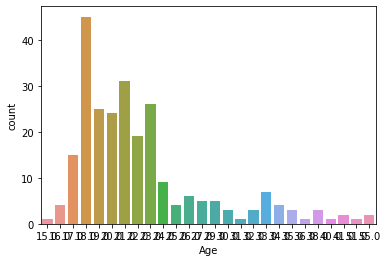

In [40]:
sns.countplot(df['Age'])

C:\Users\marci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

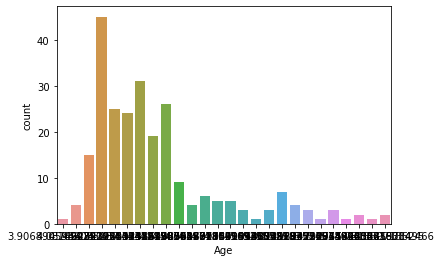

In [43]:
sns.countplot(df_scale['Age'])

In [44]:
df['Age'].skew()

2.3251914873753736

In [55]:
df_scale['Age'].skew()

1.42443294818763